In [1]:
import os
import sys
import uproot
from glob import glob
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import datetime
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
NanoAODSchema.warn_missing_crossrefs = False
from coffea.nanoevents.methods import vector
from tqdm.notebook import tqdm

from PhiCPComp import PhiCPComp

In [2]:
#file = "/Users/gsaha/Work/IPHC/HCPtoTauTau/Test1_PhiCP/GluGluHToTauTau_M125/nanoHTT_1.root"

In [3]:
#files = glob("/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_*.root")

In [4]:
#files

In [5]:
"""
fptr = uproot.open('/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_0.root')
events = NanoEventsFactory.from_root(fptr).events()


is_taum = (events.GenPart.pdgId == 15 ) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)
is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)

taum = events.GenPart[is_taum]
taup = events.GenPart[is_taup]

taum_momidx    = taum.distinctParent.genPartIdxMother
taum_mompid    = events.GenPart[taum_momidx].pdgId
taum_momstatus = events.GenPart[taum_momidx].status

taup_momidx    = taup.distinctParent.genPartIdxMother
taup_mompid    = events.GenPart[taup_momidx].pdgId
taup_momstatus = events.GenPart[taup_momidx].status

taum_momidx_   = taum_momidx[((taum_mompid == 25) & (taum_momstatus == 22))][:,:1]
taup_momidx_   = taup_momidx[((taup_mompid == 25) & (taup_momstatus == 22))][:,:1]

mask = (taum_momidx_ == taup_momidx_)

taum_h = taum[mask]
taup_h = taup[mask]
taum_h_children = ak.firsts(taum_h.distinctChildren)
taup_h_children = ak.firsts(taup_h.distinctChildren)
taus_mother     = events.GenPart[taum_momidx_]
"""

'\nfptr = uproot.open(\'/Users/gsaha/Work/IPHC/HCPtoTauTau/HCPTools/GluGluHToTauTau_M125/nanoHTT_0.root\')\nevents = NanoEventsFactory.from_root(fptr).events()\n\n\nis_taum = (events.GenPart.pdgId == 15 ) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)\nis_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"])) & (events.GenPart.status == 2)\n\ntaum = events.GenPart[is_taum]\ntaup = events.GenPart[is_taup]\n\ntaum_momidx    = taum.distinctParent.genPartIdxMother\ntaum_mompid    = events.GenPart[taum_momidx].pdgId\ntaum_momstatus = events.GenPart[taum_momidx].status\n\ntaup_momidx    = taup.distinctParent.genPartIdxMother\ntaup_mompid    = events.GenPart[taup_momidx].pdgId\ntaup_momstatus = events.GenPart[taup_momidx].status\n\ntaum_momidx_   = taum_momidx[((taum_mompid == 25) & (taum_momstatus == 22))][:,:1]\ntaup_momidx_   = taup_momidx[((taup_mompid == 25) & (taup_momstatus == 22))][:,:1]\n\nmask = (taum_momidx_ == taup_momidx_)\n\n

In [6]:
#ak.to_list(taum_h.children.pdgId[:100])

In [7]:
"""
genidxs = ak.local_index(ev.GenPart.pdgId)

is_taum = (ev.GenPart.pdgId == 15)  & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)
is_taup = (ev.GenPart.pdgId == -15) & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)

taumidx = genidxs[is_taum]
taupidx = genidxs[is_taup]

taummomidx  = genidxs[ev.GenPart[taumidx].distinctParent.pdgId == 25]
taupmomidx  = genidxs[ev.GenPart[taupidx].distinctParent.pdgId == 25]

#taum_h = taum[taum.distinctParent.pdgId == 25]
#taup_h = taup[taup.distinctParent.pdgId == 25]
#taum_children = ak.firsts(taum_h.distinctChildren)
#taup_children = ak.firsts(taup_h.distinctChildren)

ev.GenPart[taumidx].status, taumidx, taupidx, taummomidx, taupmomidx, ev.GenPart[taummomidx].pdgId, ev.GenPart[taupmomidx].pdgId, 
"""

'\ngenidxs = ak.local_index(ev.GenPart.pdgId)\n\nis_taum = (ev.GenPart.pdgId == 15)  & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)\nis_taup = (ev.GenPart.pdgId == -15) & (ev.GenPart.hasFlags(["isLastCopy"])) & (ev.GenPart.status == 2)\n\ntaumidx = genidxs[is_taum]\ntaupidx = genidxs[is_taup]\n\ntaummomidx  = genidxs[ev.GenPart[taumidx].distinctParent.pdgId == 25]\ntaupmomidx  = genidxs[ev.GenPart[taupidx].distinctParent.pdgId == 25]\n\n#taum_h = taum[taum.distinctParent.pdgId == 25]\n#taup_h = taup[taup.distinctParent.pdgId == 25]\n#taum_children = ak.firsts(taum_h.distinctChildren)\n#taup_children = ak.firsts(taup_h.distinctChildren)\n\nev.GenPart[taumidx].status, taumidx, taupidx, taummomidx, taupmomidx, ev.GenPart[taummomidx].pdgId, ev.GenPart[taupmomidx].pdgId, \n'

In [8]:
"""
taummomidx    = ev.GenPart[taumidx].distinctParent.genPartIdxMother
taummompid    = ev.GenPart[taummomidx].pdgId
taummomstatus = ev.GenPart[taummomidx].status
taupmomidx    = ev.GenPart[taupidx].distinctParent.genPartIdxMother
taupmompid    = ev.GenPart[taupmomidx].pdgId
taupmomstatus = ev.GenPart[taupmomidx].status


taummomidx_ = taummomidx[((taummompid == 25) & (taummomstatus == 22))][:,:1]
taupmomidx_ = taupmomidx[((taupmompid == 25) & (taupmomstatus == 22))][:,:1]

taummomidx_, taupmomidx_, ev.GenPart[taummomidx_].status, ev.GenPart[taupmomidx_].status
"""

'\ntaummomidx    = ev.GenPart[taumidx].distinctParent.genPartIdxMother\ntaummompid    = ev.GenPart[taummomidx].pdgId\ntaummomstatus = ev.GenPart[taummomidx].status\ntaupmomidx    = ev.GenPart[taupidx].distinctParent.genPartIdxMother\ntaupmompid    = ev.GenPart[taupmomidx].pdgId\ntaupmomstatus = ev.GenPart[taupmomidx].status\n\n\ntaummomidx_ = taummomidx[((taummompid == 25) & (taummomstatus == 22))][:,:1]\ntaupmomidx_ = taupmomidx[((taupmompid == 25) & (taupmomstatus == 22))][:,:1]\n\ntaummomidx_, taupmomidx_, ev.GenPart[taummomidx_].status, ev.GenPart[taupmomidx_].status\n'

In [9]:
"""
taups_prod = None
taums_prod = None
taup_childrens_prod = None
taum_childrens_prod = None
for i,file in enumerate(files):
    fptr = uproot.open(file)
    events = NanoEventsFactory.from_root(fptr).events()
    mask_events_with_at_least_two_taus = ak.num(events.Tau.pt, axis=1) >= 2
    events = events[mask_events_with_at_least_two_taus]
    
    is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))
    is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))
    
    taum = events.GenPart[is_taum]
    taup = events.GenPart[is_taup]
    
    taum_h = taum[taum.distinctParent.pdgId == 25]
    taup_h = taup[taup.distinctParent.pdgId == 25]
    taum_children = ak.firsts(taum_h.distinctChildren)
    taup_children = ak.firsts(taup_h.distinctChildren)
    
    for j in range(10):
        print(f"idx: {j}\ttaum decay: {taum_children.pdgId[j]}\t\t\ttaup decay: {taup_children.pdgId[j]}\n")
    
    if i==0:
        taups_prod = taup_h
        taums_prod = taum_h
        taup_childrens_prod = taup_children
        taum_childrens_prod = taum_children
    else:
        taups_prod = ak.concatenate([taups_prod, taup_h], axis=0)
        taums_prod = ak.concatenate([taums_prod, taum_h], axis=0)
        taup_childrens_prod = ak.concatenate([taup_childrens_prod, taup_children], axis=0)
        taum_childrens_prod = ak.concatenate([taum_childrens_prod, taum_children], axis=0)
        
    
    #taup_list.append(taup_h)
    #taum_list.append(taum_h)
    #taup_children_list.append(taup_children)
    #taum_children_list.append(taum_children)
    
#taup = ak.concatenate(taup_list, axis=0)    
#taup = ak.concatenate(taum_list, axis=0)
#taup_children = ak.concatenate(taup_children_list, axis=0)
#taum_children = ak.concatenate(taum_children_list, axis=0)
"""

'\ntaups_prod = None\ntaums_prod = None\ntaup_childrens_prod = None\ntaum_childrens_prod = None\nfor i,file in enumerate(files):\n    fptr = uproot.open(file)\n    events = NanoEventsFactory.from_root(fptr).events()\n    mask_events_with_at_least_two_taus = ak.num(events.Tau.pt, axis=1) >= 2\n    events = events[mask_events_with_at_least_two_taus]\n    \n    is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))\n    is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))\n    \n    taum = events.GenPart[is_taum]\n    taup = events.GenPart[is_taup]\n    \n    taum_h = taum[taum.distinctParent.pdgId == 25]\n    taup_h = taup[taup.distinctParent.pdgId == 25]\n    taum_children = ak.firsts(taum_h.distinctChildren)\n    taup_children = ak.firsts(taup_h.distinctChildren)\n    \n    for j in range(10):\n        print(f"idx: {j}\ttaum decay: {taum_children.pdgId[j]}\t\t\ttaup decay: {taup_children.pdgId[j]}\n")\n    \n    if i==0:\n     

In [10]:

#mask1 = ak.num(taups_prod.pdgId == -15) == 1
#mask1 = (taups.pdgId == -15)   # 1709358
#ak.sum(mask1)
"""
mask1 = ak.num(taups_prod.pdgId == -15) == 1
mask2 = ak.num(taums_prod.pdgId == 15) == 1

mask = mask1 & mask2
ak.sum(mask)

taups = taups_prod[mask]
taums = taums_prod[mask]
taup_childrens = taup_childrens_prod[mask]
taum_childrens = taum_childrens_prod[mask]
"""

'\nmask1 = ak.num(taups_prod.pdgId == -15) == 1\nmask2 = ak.num(taums_prod.pdgId == 15) == 1\n\nmask = mask1 & mask2\nak.sum(mask)\n\ntaups = taups_prod[mask]\ntaums = taums_prod[mask]\ntaup_childrens = taup_childrens_prod[mask]\ntaum_childrens = taum_childrens_prod[mask]\n'

In [11]:
#mask2 = (taums.pdgId == 15)
#ak.sum(mask2)
#taups = taups[mask2]
#taums = taums[mask2]
#taup_childrens = taup_childrens[mask2]
#taum_childrens = taum_childrens[mask2]

In [12]:
#taups.pdgId, taums.pdgId, taup_childrens.pdgId, taum_childrens.pdgId

In [13]:
#ak.sum(ak.num(taups.pdgId, axis=1) == 2)

In [14]:
"""
ak.to_parquet(taups, "taup.parquet")
ak.to_parquet(taums, "taum.parquet")
ak.to_parquet(taup_childrens, "taup_decay.parquet")
ak.to_parquet(taum_childrens, "taum_decay.parquet")
"""

'\nak.to_parquet(taups, "taup.parquet")\nak.to_parquet(taums, "taum.parquet")\nak.to_parquet(taup_childrens, "taup_decay.parquet")\nak.to_parquet(taum_childrens, "taum_decay.parquet")\n'

In [15]:
taum = ak.from_parquet("taum.parquet")
taup = ak.from_parquet("taup.parquet")
taum_children = ak.from_parquet("taum_decay.parquet")
taup_children = ak.from_parquet("taup_decay.parquet")

In [16]:
taup_children.pdgId

<Array [[-16, 111, 211], ... [-16, 111, 211]] type='1709262 * option[var * ?int32]'>

In [17]:
taum.pdgId

<Array [[15], [15], [15], ... [15], [15], [15]] type='1709262 * var * ?int32'>

In [18]:
"""
is_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))
is_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))

taum_idxs = genidxs[is_taum]
taup_idxs = genidxs[is_taup]
taum_idxs, taup_idxs

gentaum = events.GenPart[taum_idxs]
gentaum.distinctParent.pdgId == 25

taum_idxs_h = taum_idxs[events.GenPart[taum_idxs].distinctParent.pdgId == 25]
taup_idxs_h = taup_idxs[events.GenPart[taup_idxs].distinctParent.pdgId == 25]

taum_idxs_h, taup_idxs_h

taum = events.GenPart[taum_idxs_h]
taup = events.GenPart[taup_idxs_h]
taum.pdgId, taup.pdgId

taum_children = ak.firsts(taum_h.distinctChildren)
taup_children = ak.firsts(taup_h.distinctChildren)
taum_children, taup_children
"""

'\nis_taum = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isLastCopy"]))\nis_taup = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isLastCopy"]))\n\ntaum_idxs = genidxs[is_taum]\ntaup_idxs = genidxs[is_taup]\ntaum_idxs, taup_idxs\n\ngentaum = events.GenPart[taum_idxs]\ngentaum.distinctParent.pdgId == 25\n\ntaum_idxs_h = taum_idxs[events.GenPart[taum_idxs].distinctParent.pdgId == 25]\ntaup_idxs_h = taup_idxs[events.GenPart[taup_idxs].distinctParent.pdgId == 25]\n\ntaum_idxs_h, taup_idxs_h\n\ntaum = events.GenPart[taum_idxs_h]\ntaup = events.GenPart[taup_idxs_h]\ntaum.pdgId, taup.pdgId\n\ntaum_children = ak.firsts(taum_h.distinctChildren)\ntaup_children = ak.firsts(taup_h.distinctChildren)\ntaum_children, taup_children\n'

In [19]:
for i in range(10):
    print(f"idx: {i}\ttaum decay: {taum_children.pdgId[i]}\t\t\ttaup decay: {taup_children.pdgId[i]}\n")

idx: 0	taum decay: [16, 111, -211]			taup decay: [-16, 111, 211]

idx: 1	taum decay: [16, 111, 111, 111, -211]			taup decay: [-16, 111, 211]

idx: 2	taum decay: [16, 111, -211, -211, 211]			taup decay: [-16, 211, 211, -211]

idx: 3	taum decay: [16, -211, -211, 211]			taup decay: [-16, 211]

idx: 4	taum decay: [16, -211]			taup decay: [-16, 211, 211, -211]

idx: 5	taum decay: [16, 111, -211, -311]			taup decay: [-16, 211, 211, -211]

idx: 6	taum decay: [16, -211, -211, 211]			taup decay: [-16, 211, 211, -211]

idx: 7	taum decay: [16, 111, -211]			taup decay: [-16, 111, 211]

idx: 8	taum decay: [16, 13, -14]			taup decay: [-16, 211]

idx: 9	taum decay: [16, 111, 111, -211]			taup decay: [-16, 111, 211, 211, -211]



In [20]:
"""
#events = ak.concatenate([eventlist[0]], axis=0)
events = eventlist[0]
# get the genpart local indices
genidxs = ak.local_index(events.GenPart.pdgId)
#genidxs = ak.local_index(events.pdgId)

is_taum_from_h = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)
is_taup_from_h = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)

is_taum_from_h = ak.fill_none(is_taum_from_h, False)
is_taup_from_h = ak.fill_none(is_taup_from_h, False)

taum_idxs = genidxs[is_taum_from_h]
taup_idxs = genidxs[is_taup_from_h]

# Get the children

taum_decay = events.GenPart[taum_idxs].children
taup_decay = events.GenPart[taup_idxs].children

hasloop_taum = ak.sum(taum_decay.pdgId == 15, axis=-1)
hasloop_taup = ak.sum(taup_decay.pdgId == -15, axis=-1)
print(hasloop_taum, hasloop_taup)

taum_decay_decay = ak.firsts(taum_decay.children, axis=2)
taup_decay_decay = ak.firsts(taup_decay.children, axis=2)

taum_children = ak.where(hasloop_taum == 0, taum_decay, taum_decay_decay)
taup_children = ak.where(hasloop_taup == 0, taup_decay, taup_decay_decay)

for i in range(10):
    print(f"idx: {i}\ttaum decay: {taum_children.pdgId[i]}\t\t\ttaup decay: {taup_children.pdgId[i]}\n")
    
taum = events.GenPart[taum_idxs]#.GenPart[taum_idxs]
taup = events.GenPart[taup_idxs]#.GenPart[taup_idxs]

taum_children_2 = ak.firsts(taum_children, axis=1)
taup_children_2 = ak.firsts(taup_children, axis=1)

mask = (ak.num(taum_children_2.pdgId, axis=1) > 0) & (ak.num(taup_children_2.pdgId, axis=1) > 0)

taum = taum[mask]
taum_children = taum_children_2[mask]

taup = taup[mask]
taup_children = taup_children_2[mask]

print(taum.pdgId, taum_children.pdgId, taup.pdgId, taup_children.pdgId)
"""

'\n#events = ak.concatenate([eventlist[0]], axis=0)\nevents = eventlist[0]\n# get the genpart local indices\ngenidxs = ak.local_index(events.GenPart.pdgId)\n#genidxs = ak.local_index(events.pdgId)\n\nis_taum_from_h = (events.GenPart.pdgId == 15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)\nis_taup_from_h = (events.GenPart.pdgId == -15) & (events.GenPart.hasFlags(["isFirstCopy"])) & (events.GenPart.parent.pdgId == 25)\n\nis_taum_from_h = ak.fill_none(is_taum_from_h, False)\nis_taup_from_h = ak.fill_none(is_taup_from_h, False)\n\ntaum_idxs = genidxs[is_taum_from_h]\ntaup_idxs = genidxs[is_taup_from_h]\n\n# Get the children\n\ntaum_decay = events.GenPart[taum_idxs].children\ntaup_decay = events.GenPart[taup_idxs].children\n\nhasloop_taum = ak.sum(taum_decay.pdgId == 15, axis=-1)\nhasloop_taup = ak.sum(taup_decay.pdgId == -15, axis=-1)\nprint(hasloop_taum, hasloop_taup)\n\ntaum_decay_decay = ak.firsts(taum_decay.children, axis=2)\ntaup_decay_decay = a

In [21]:
#for i in events.fields:
#    temp = events[i].fields
#    print(f"{i}\n{temp}\n")

In [22]:
"""
def get_mom(idxs):
    gens = events.GenPart[idxs]
    mompid = gens.parent.pdgId
    gmompid = gens.parent.parent.pdgId
    ggmompid = gens.parent.parent.parent.pdgId
    mompid = ak.where(gens.pdgId == mompid, 
                      gmompid,
                      ak.where(gens.pdgId == gmompid, ggmompid, gmompid))
    return mompid
"""

'\ndef get_mom(idxs):\n    gens = events.GenPart[idxs]\n    mompid = gens.parent.pdgId\n    gmompid = gens.parent.parent.pdgId\n    ggmompid = gens.parent.parent.parent.pdgId\n    mompid = ak.where(gens.pdgId == mompid, \n                      gmompid,\n                      ak.where(gens.pdgId == gmompid, ggmompid, gmompid))\n    return mompid\n'

In [23]:
# prepare masks to select taus 

"""
is_taum_from_h = (events.pdgId == 15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)
is_taup_from_h = (events.pdgId == -15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)

is_taum_from_h = ak.fill_none(is_taum_from_h, False)
is_taup_from_h = ak.fill_none(is_taup_from_h, False)
is_taum_from_h, is_taup_from_h
"""

'\nis_taum_from_h = (events.pdgId == 15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)\nis_taup_from_h = (events.pdgId == -15) & (events.hasFlags(["isFirstCopy"])) & (events.parent.pdgId == 25)\n\nis_taum_from_h = ak.fill_none(is_taum_from_h, False)\nis_taup_from_h = ak.fill_none(is_taup_from_h, False)\nis_taum_from_h, is_taup_from_h\n'

In [24]:
# get the indices of the selected taus

#taum_idxs, taup_idxs

In [25]:
#ak.max(ak.num(taup_idxs))

In [26]:
#np.unique(ak.ravel(ak.sort(events.GenPart[taum_idxs].status, ascending=False, axis=0)).to_numpy())
#np.unique(ak.ravel(ak.sort(events[taum_idxs].status, ascending=False, axis=0)).to_numpy())

In [27]:

"""
taum_decay = events[taum_idxs].children
taup_decay = events[taup_idxs].children
"""
#taum_decay = ak.firsts(genpart[taum_idxs].children)
#taup_decay = ak.firsts(genpart[taup_idxs].children)


#loop_taum = ak.sum((taum_decay.pdgId == 15), axis=1)[..., None][...,:]
#loop_taup = ak.sum((taup_decay.pdgId == -15), axis=1)[..., None][...,:]

#taum_decay.pdgId[:2], taup_decay.pdgId[:2]

'\ntaum_decay = events[taum_idxs].children\ntaup_decay = events[taup_idxs].children\n'

In [28]:


#taum_decay_decay = ak.firsts(taum_decay.children, axis=2)
#taup_decay_decay = ak.firsts(taup_decay.children, axis=2)

In [29]:
#taum_decay_decay.pdgId[:2], taup_decay_decay.pdgId[:2]

In [30]:
#taum_children = ak.where(hasloop_taum == 0, taum_decay, taum_decay_decay)
#taup_children = ak.where(hasloop_taup == 0, taup_decay, taup_decay_decay)

In [31]:
#taum_children.pdgId

In [32]:
#taup_children.pdgId

In [33]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\nphicp\n'

In [34]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\n#phicp = phicp_obj.comp_PhiCP_DP()\nphicp\n'

 --- comp_phiCP --- 
 --- gethvecs --- 
 --- gethvecs_rhorho --- 
Selection of rho-rho pair [mask]: [True, False, False, False, False, False, ... False, False, True, False, False]
n total events: 1709262
n selected events: 211211
 --- pT  : [[18.4], [6.46], [7.84], [67.4], [90.4], ... [40.9], [143], [21.5], [65.6], [19.4]]
 --- eta : [[-3.37], [2.89], [-3.45], [-0.236], ... [0.624], [-2.21], [-1.89], [2.33]]
 --- phi : [[-2.29], [0.932], [-1.28], [3.03], ... [-1.72], [0.544], [-1.91], [2.18]]
 --- mass: [[125], [125], [125], [124], [108], [125, ... [125], [125], [125], [125], [125]]
taup p4 + taum p4 ...
    px: [[-12.1], [3.85], [2.29], [-67], [90.2, ... [-20.7], [18.4], [-21.7], [-11.2]]
    py: [[-13.9], [5.19], [-7.5], [7.57], [-6.13, ... 33.5], [-141], [11.2], [-61.9], [15.9]]
    pz: [[-266], [58], [-123], [-16], [-73.5], ... [119], [94.9], [-97], [-212], [98.9]]
    E: [[295], [138], [176], [142], [159], [175, ... [177], [212], [160], [254], [161]]
 ---> Plotting ---> 


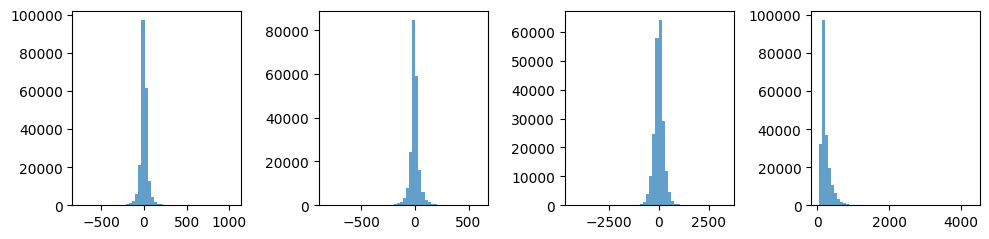

Higgs boost vec: 
    x: [[-0.0411], [0.0279], [0.013], [-0.471], ... -0.0976], [0.115], [-0.0852], [-0.0696]]
    y: [[-0.0471], [0.0376], [-0.0427], [0.0531], ... -0.666], [0.0699], [-0.243], [0.0989]]
    z: [[-0.903], [0.42], [-0.7], [-0.113], ... [0.448], [-0.607], [-0.832], [0.616]]
 ---> Plotting ---> 


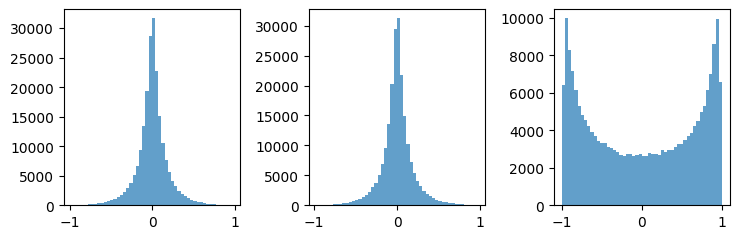

 --- gethvec_rho --- 
Lab frame: 
  Tau: 
    px: [[-41.4], [-4.24], [0.41], [32.7], [33.3, ... [-43.9], [-8.85], [13.8], [-13.8]]
    py: [[-38.1], [60.6], [20.5], [17.8], [44.2, ... 77.7], [-50.3], [53.6], [28.4], [-51.8]]
    pz: [[-50.5], [54.8], [20.8], [-19.4], [-3.35, ... [97.4], [-94.5], [-107], [21.7]]
    E: [[75.6], [81.8], [29.2], [42], [55.5], ... [113], [118], [109], [112], [57.9]]
 ---> Plotting ---> 


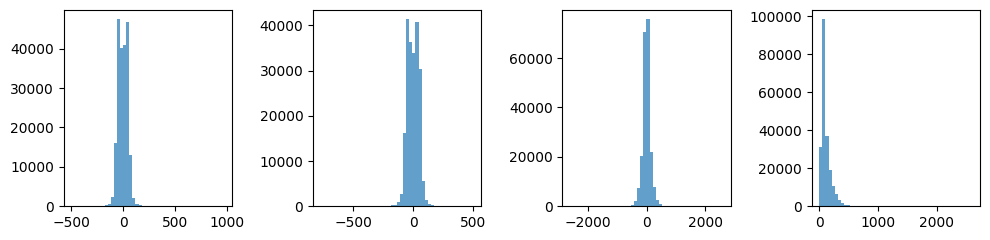

  Pi: 
    px: [[-4.2], [-2.58], [-0.09], [1.69], [9.26, ... [-23.6], [-0.929], [9.8], [-1.41]]
    py: [[-3.74], [27.6], [3.92], [0.811], [12.7, ... 8.4], [-27.4], [6.78], [21.4], [-4.67]]
    pz: [[-5.09], [25], [4.24], [-1.1], [-1.25], ... 7.41], [52.5], [-12.7], [-78.6], [1.81]]
    E: [[7.59], [37.3], [5.78], [2.18], [15.7], ... [11.8], [63.7], [14.4], [82], [5.2]]
 ---> Plotting ---> 


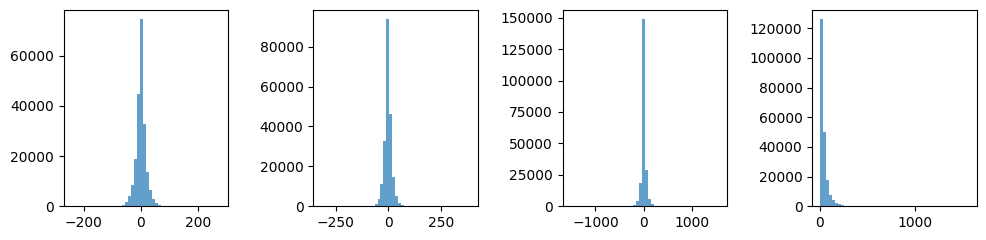

  Pi0: 
    px: [[-12.2], [-1.25], [0.781], [8.36], [20.9, ... [-6.91], [-6.54], [1.6], [-2.68]]
    py: [[-10.4], [17.8], [11.7], [4.83], [26.9, ... 14.8], [-7.91], [38.7], [3.09], [-10.2]]
    pz: [[-14.9], [15.7], [10.9], [-4.32], [-1.55, ... [14.6], [-68.6], [-12.7], [4.94]]
    E: [[21.9], [23.8], [16], [10.6], [34.2], ... [21.6], [18], [79], [13.2], [11.6]]
 ---> Plotting ---> 


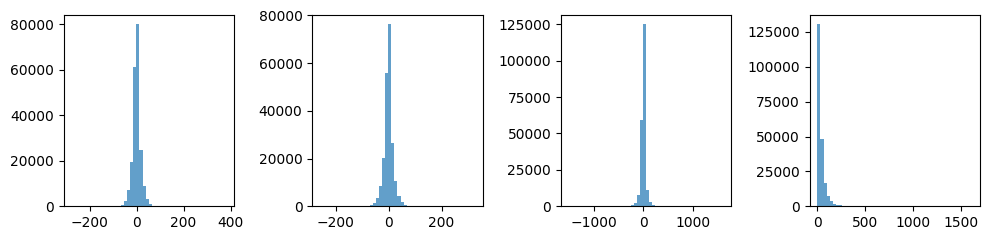

  Nu: 
    px: [[-25], [-0.406], [-0.266], [22.7], [3.05, ... [-13.6], [-1.25], [2.43], [-9.7]]
    py: [[-23.7], [15.1], [4.9], [12.2], [4.61], ... 54.5], [-14.9], [8.16], [3.92], [-36.9]]
    pz: [[-30.4], [14], [5.6], [-14], [-0.555], ... [52.5], [30.4], [-13.4], [-16.2], [14.9]]
    E: [[46], [20.6], [7.45], [29.3], [5.56], ... [79.8], [36.5], [15.7], [16.9], [40.9]]
 ---> Plotting ---> 


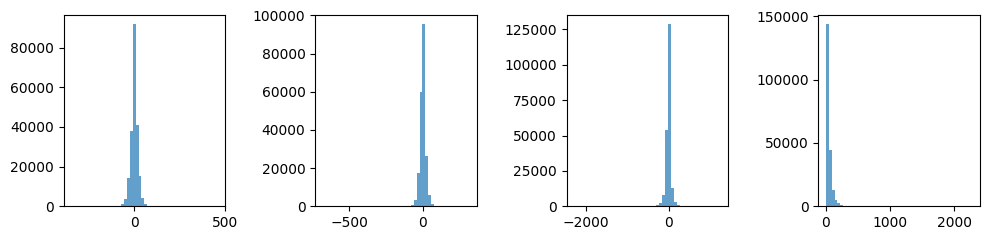

Rest frame: 
  Tau: 
    px: [[-37.4], [-6.35], [-0.288], [58.9], [-3.71, ... [-32.8], [-20], [23.8], [-9.14]]
    py: [[-33.5], [57.8], [22.8], [14.9], [46.8], ... 58.2], [25.4], [46.9], [56.8], [-58.5]]
    pz: [[37.1], [23], [58.3], [-13.1], [26.8], ... [5.15], [46.5], [-36.1], [-10], [-20]]
    E: [[62.5], [62.5], [62.6], [62.2], [54.1], ... [62.5], [62.4], [62.5], [62.4], [62.5]]
 ---> Plotting ---> 


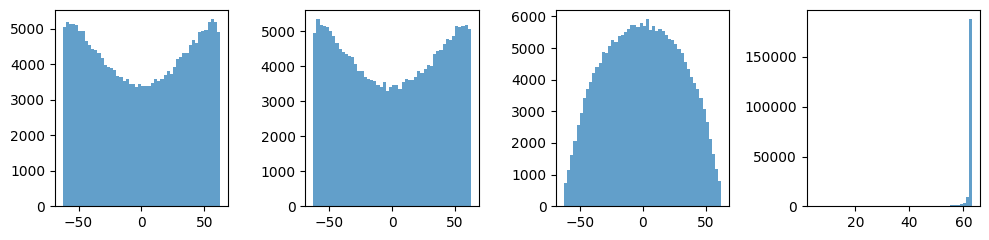

  Pi: 
    px: [[-3.8], [-3.55], [-0.229], [3.05], ... [-17.6], [-2.39], [17.1], [-0.979]]
    py: [[-3.28], [26.3], [4.38], [0.658], [13.4], ... 6.35], [13.3], [5.9], [42.3], [-5.28]]
    pz: [[3.67], [10.4], [11.7], [-0.78], [7.29], ... 0.154], [25.1], [-5], [-7.05], [-1.97]]
    E: [[6.22], [28.5], [12.5], [3.22], [15.3], ... [6.71], [33.4], [8.1], [46.2], [5.72]]
 ---> Plotting ---> 


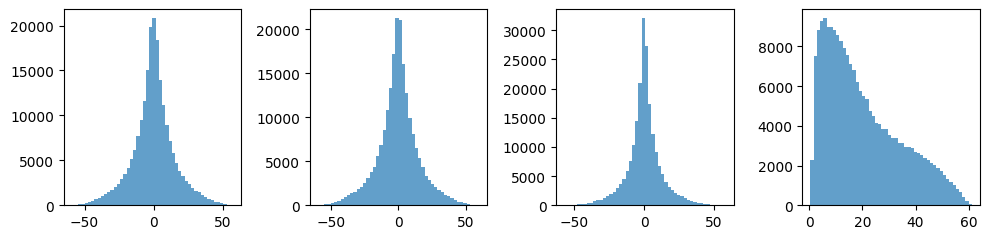

  Pi0: 
    px: [[-11.1], [-1.86], [0.403], [15], [-1.82, ... [-5.23], [-14.6], [2.75], [-1.75]]
    py: [[-9.09], [17], [12.9], [4.08], [28.5], ... [11.1], [3.56], [33.8], [6.4], [-11.5]]
    pz: [[10.2], [6.43], [31.2], [-2.74], [17], ... [1.13], [6.9], [-26.2], [-1.39], [-3.28]]
    E: [[17.6], [18.3], [33.8], [15.8], [33.2], ... [11.8], [9.36], [45.2], [7.11], [12.1]]
 ---> Plotting ---> 


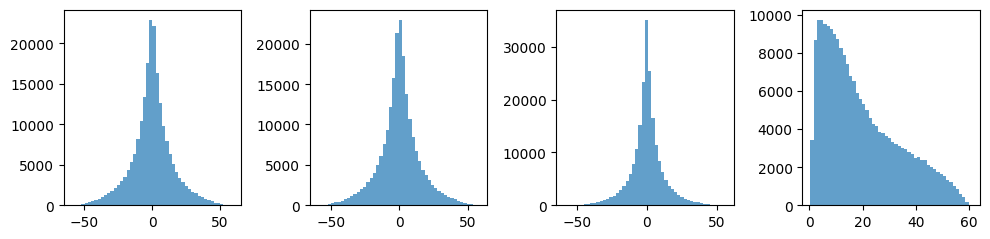

  Pi-Pi0: 
    px: [[7.3], [-1.69], [-0.632], [-11.9], [0.601, ... [-12.4], [12.2], [14.4], [0.774]]
    py: [[5.81], [9.33], [-8.53], [-3.42], [-15.1, ... [9.76], [-27.9], [35.9], [6.23]]
    pz: [[-6.5], [4.01], [-19.5], [1.96], [-9.71, ... [18.2], [21.2], [-5.66], [1.31]]
    E: [[-11.4], [10.3], [-21.3], [-12.5], [-17.9, ... [24.1], [-37.1], [39.1], [-6.37]]
 ---> Plotting ---> 


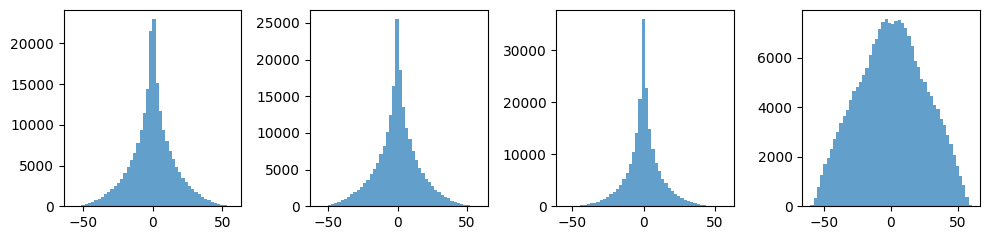

hvec raw: [[{x: -6.41e+03, y: -5.1e+03, z: 5.7e+03}], ... {x: -443, y: -3.56e+03, z: -749}]]
    x: [[-6.41e+03], [-542], [438], [1.29e+04, ... [-8.31e+03], [1.03e+04], [-443]]
    y: [[-5.1e+03], [3e+03], [5.92e+03], ... [1.9e+04], [2.56e+04], [-3.56e+03]]
    z: [[5.7e+03], [1.29e+03], [1.35e+04], ... [-1.45e+04], [-4.04e+03], [-749]]
 ---> Plotting ---> 


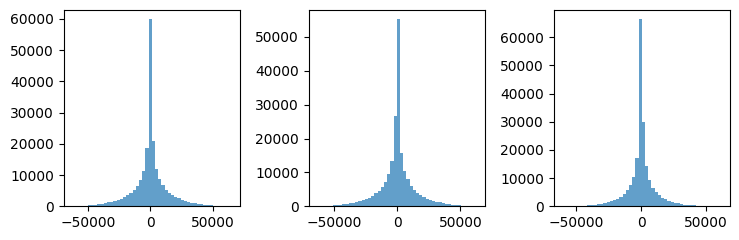

mag: [[9.98e+03], [3.31e+03], [1.48e+04], ... [2.53e+04], [2.79e+04], [3.66e+03]]
 ---> Plotting ---> 


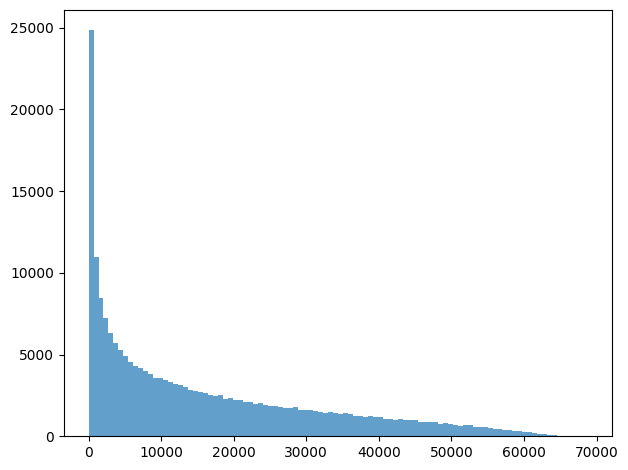

 --- gethvec_rho --- 
Lab frame: 
  Tau: 
    px: [[29.3], [8.09], [1.88], [-99.7], [56.9], ... 12.2], [23.2], [27.3], [-35.5], [2.68]]
    py: [[24.2], [-55.4], [-28], [-10.3], [-50.4, ... [-90.8], [-42.5], [-90.3], [67.7]]
    pz: [[-216], [3.19], [-144], [3.38], [-70.2, ... 44.6], [-2.53], [-2.44], [-104], [77.2]]
    E: [[219], [56.1], [146], [100], [103], ... [64], [93.8], [50.6], [142], [103]]
 ---> Plotting ---> 


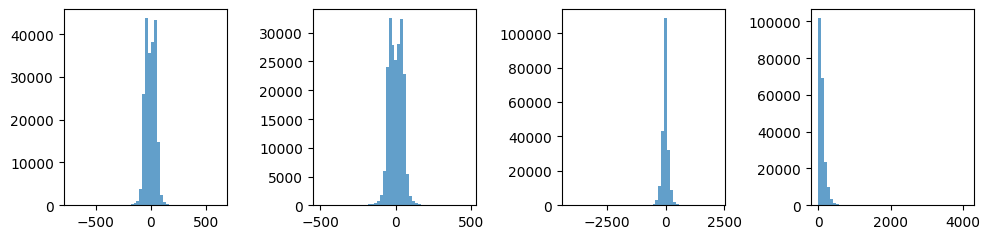

  Pi: 
    px: [[22.2], [7.79], [0.874], [-66.1], [9.32, ... [16.7], [17.9], [-11.4], [1.03]]
    py: [[18.4], [-51.9], [-20.1], [-7.32], [-7.5, ... [-63.1], [-28.9], [-29], [17.3]]
    pz: [[-161], [3.11], [-103], [2.7], [-11.1], ... [2.73], [-2.29], [-1.54], [-33.6], [20]]
    E: [[164], [52.6], [105], [66.6], [16.4], ... [3.93], [65.3], [34], [45.8], [26.5]]
 ---> Plotting ---> 


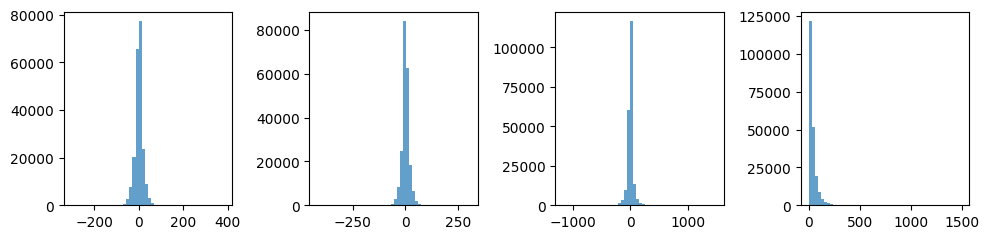

  Pi0: 
    px: [[1.64], [0.404], [0.323], [-15.9], [5.23, ... [1.24], [7.22], [-15.9], [0.588]]
    py: [[1.45], [-3.11], [-4.82], [-1.76], [-4.95, ... [-4.36], [-10.7], [-40.4], [13.5]]
    pz: [[-11.9], [0.0456], [-23.4], [0.31], ... [-0.039], [-0.468], [-45.5], [14.5]]
    E: [[12.1], [3.14], [23.9], [16], [9.83], ... [56.9], [4.53], [12.9], [62.9], [19.8]]
 ---> Plotting ---> 


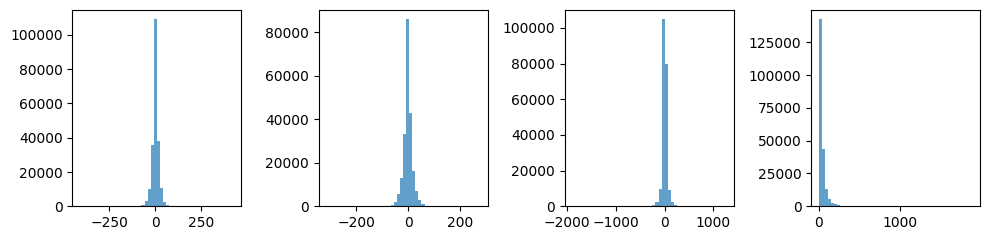

  Nu: 
    px: [[5.45], [-0.0722], [0.695], [-17.9], [42.4, ... [5.48], [2.22], [-8.44], [1.17]]
    py: [[4.29], [-0.408], [-3.06], [-1.28], [-37.9, ... [-23.3], [-2.91], [-21], [36.9]]
    pz: [[-43], [0.0319], [-16.6], [0.382], ... [-0.193], [-0.438], [-25.2], [42.8]]
    E: [[43.5], [0.415], [16.9], [17.9], [77.3], ... [3.31], [23.9], [3.69], [33.9], [56.5]]
 ---> Plotting ---> 


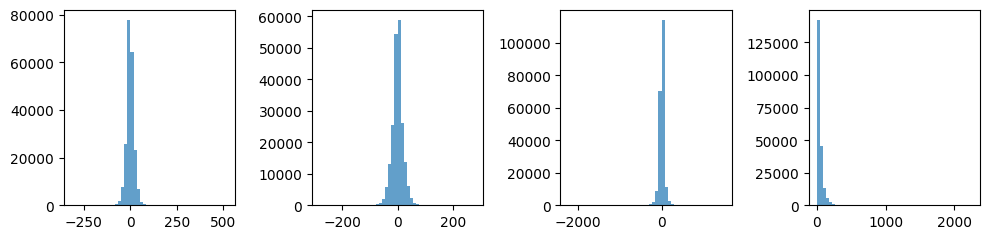

Rest frame: 
  Tau: 
    px: [[37.4], [6.35], [0.288], [-58.9], [3.71], ... [22], [32.8], [20], [-23.8], [9.14]]
    py: [[33.5], [-57.8], [-22.8], [-14.9], [-46.8, ... [-25.4], [-46.9], [-56.8], [58.5]]
    pz: [[-37.1], [-23], [-58.3], [13.1], [-26.8], ... [-5.15], [-46.5], [36.1], [10], [20]]
    E: [[62.5], [62.5], [62.6], [62.2], [54.1], ... [62.5], [62.4], [62.5], [62.4], [62.5]]
 ---> Plotting ---> 


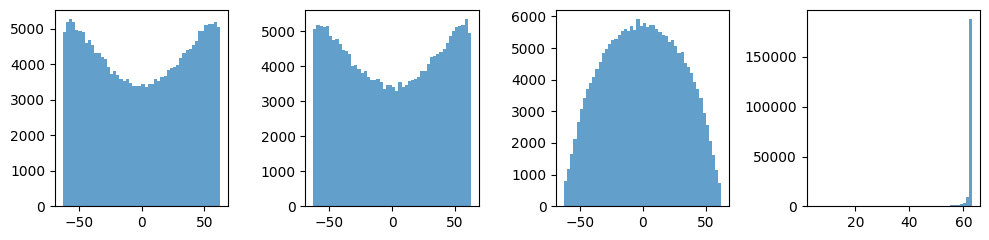

  Pi: 
    px: [[28.3], [6.16], [-0.265], [-39], [1.01], ... [1.42], [23.4], [13], [-7.63], [2.69]]
    py: [[25.4], [-54.1], [-16.4], [-10.4], [-6.94, ... [-17.3], [-31.9], [-18.2], [15]]
    pz: [[-27.6], [-21.4], [-41.8], [9.18], [-4.37, ... [-33.1], [24.4], [3.09], [5.22]]
    E: [[47], [58.5], [44.9], [41.4], [8.26], ... [3.85], [44.1], [42.2], [20], [16.1]]
 ---> Plotting ---> 


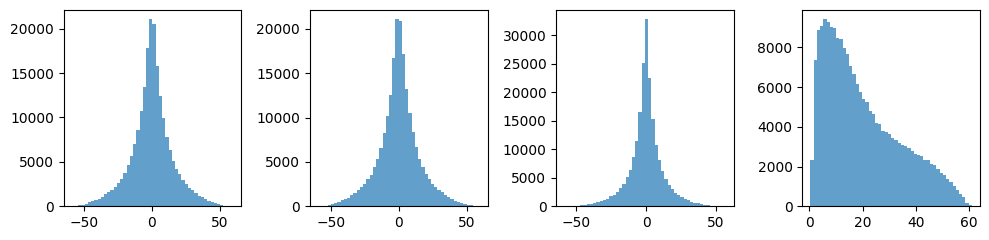

  Pi0: 
    px: [[2.09], [0.306], [0.0635], [-9.38], [0.135, ... [1.71], [5.34], [-10.7], [1.85]]
    py: [[1.97], [-3.24], [-3.97], [-2.49], [-4.6, ... [-1.2], [-11.9], [-25.5], [11.7]]
    pz: [[-2.01], [-1.43], [-9.44], [1.86], [-2.53, ... [-2.16], [9.42], [5.27], [3.37]]
    E: [[3.51], [3.56], [10.2], [9.88], [5.26], ... [55.2], [3.01], [16.1], [28.1], [12.3]]
 ---> Plotting ---> 


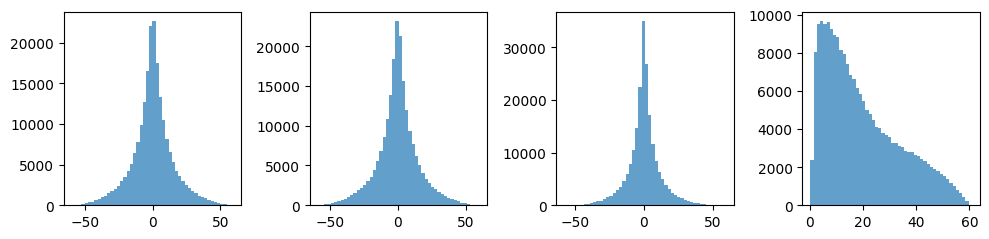

  Pi-Pi0: 
    px: [[26.2], [5.86], [-0.328], [-29.6], [0.874, ... [21.7], [7.64], [3.04], [0.843]]
    py: [[23.4], [-50.9], [-12.4], [-7.89], [-2.34, ... [-16.1], [-20], [7.29], [3.25]]
    pz: [[-25.6], [-20], [-32.4], [7.32], [-1.83], ... [3.8], [-30.9], [15], [-2.18], [1.85]]
    E: [[43.5], [55], [34.7], [31.5], [3], ... [-51.3], [41], [26.1], [-8.15], [3.75]]
 ---> Plotting ---> 


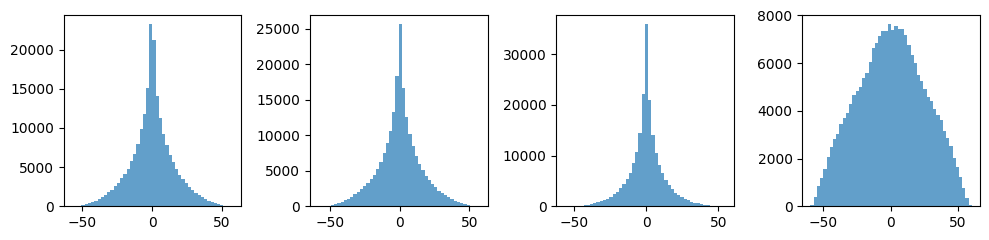

hvec raw: [[{x: 2.73e+04, y: 2.44e+04, z: -2.66e+04}], ... [{x: 219, y: 855, z: 483}]]
    x: [[2.73e+04], [267], [-169], [-2.03e+04], ... [2.72e+04], [1.67e+03], [-708], [219]]
    y: [[2.44e+04], [-2.32e+03], [-6.4e+03], ... [-4.38e+03], [-1.7e+03], [855]]
    z: [[-2.66e+04], [-912], [-1.67e+04], [5.02e+03, ... [3.29e+03], [506], [483]]
 ---> Plotting ---> 


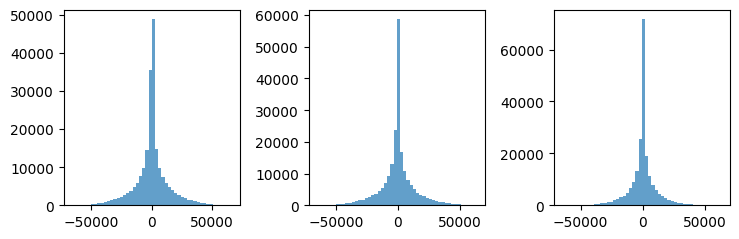

mag: [[4.53e+04], [2.51e+03], [1.79e+04], ... [5.73e+03], [1.91e+03], [1.01e+03]]
 ---> Plotting ---> 


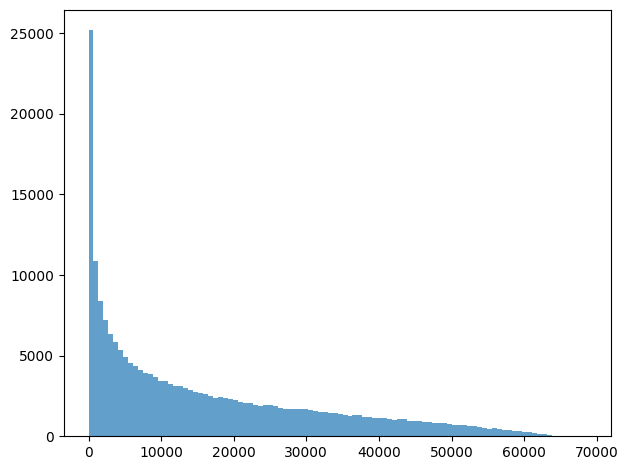

h1: unitvec
    x: [[-0.642], [-0.164], [0.0296], [0.95], ... [-0.514], [-0.328], [0.368], [-0.121]]
    y: [[-0.511], [0.906], [0.4], [0.272], ... [0.405], [0.752], [0.919], [-0.971]]
    z: [[0.572], [0.389], [0.916], [-0.156], ... [0.756], [-0.571], [-0.145], [-0.204]]
 ---> Plotting ---> 


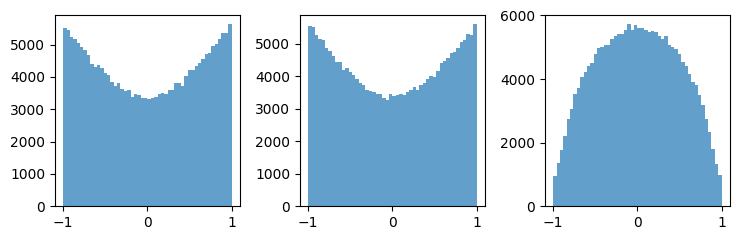

h2: unitvec
    x: [[0.603], [0.106], [-0.00945], [-0.94], ... [0.528], [0.292], [-0.371], [0.218]]
    y: [[0.539], [-0.926], [-0.358], [-0.251], ... [-0.391], [-0.765], [-0.89], [0.85]]
    z: [[-0.588], [-0.363], [-0.934], [0.232], ... [-0.754], [0.574], [0.266], [0.48]]
 ---> Plotting ---> 


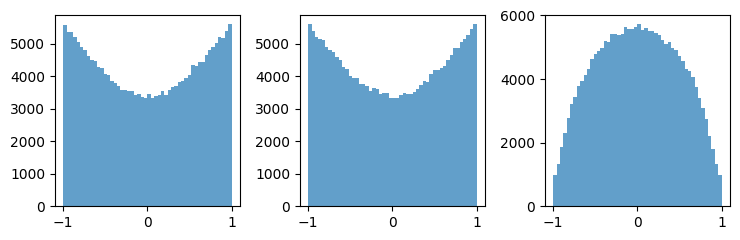

tau- hrest unit
    x: [[-0.599], [-0.102], [-0.00459], [0.948], ... [-0.527], [-0.32], [0.381], [-0.146]]
    y: [[-0.536], [0.924], [0.364], [0.239], ... [0.407], [0.751], [0.91], [-0.936]]
    z: [[0.594], [0.368], [0.931], [-0.212], ... [0.746], [-0.578], [-0.161], [-0.32]]
 ---> Plotting ---> 


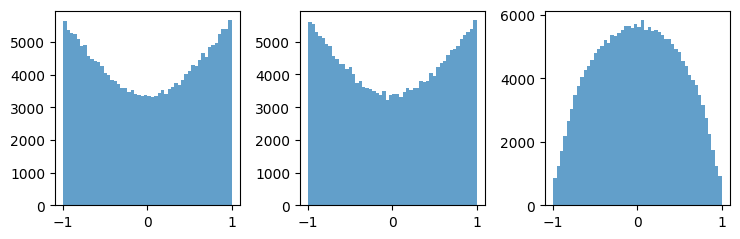

tau+ hrest unit
    x: [[0.599], [0.102], [0.00459], [-0.948], ... [0.527], [0.32], [-0.381], [0.146]]
    y: [[0.536], [-0.924], [-0.364], [-0.239], ... [-0.407], [-0.751], [-0.91], [0.936]]
    z: [[-0.594], [-0.368], [-0.931], [0.212], ... [-0.746], [0.578], [0.161], [0.32]]
 ---> Plotting ---> 


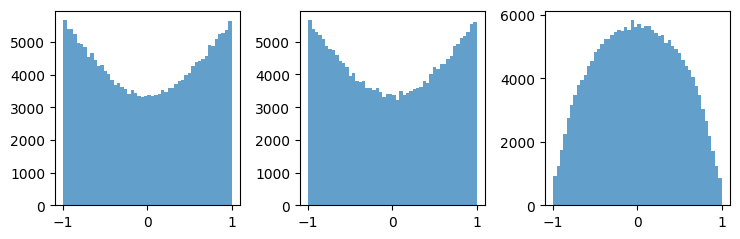

k1raw
    x: [[0.00286], [-0.0266], [0.0394], [-0.0203, ... [-0.00518], [-0.0157], [0.119]]
    y: [[0.0391], [0.0206], [-0.0318], [0.0533, ... [-0.00711], [0.00387], [-0.00872]]
    z: [[0.0381], [-0.0591], [0.0126], [-0.0308, ... [-0.00638], [-0.0152], [-0.029]]
 ---> Plotting ---> 


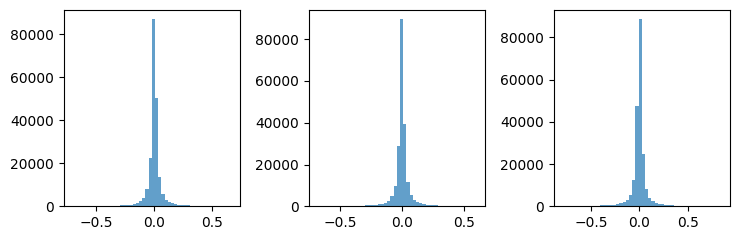

k2raw
    x: [[-0.00508], [0.00461], [-0.00675], [0.0026, ... [-0.0106], [0.0989], [-0.178]]
    y: [[0.00638], [0.00222], [-0.0131], [-0.0214, ... [0.0147], [-0.0415], [0.000475]]
    z: [[0.000631], [-0.0043], [0.00508], [-0.0126, ... [0.025], [-0.000836], [0.0799]]
 ---> Plotting ---> 


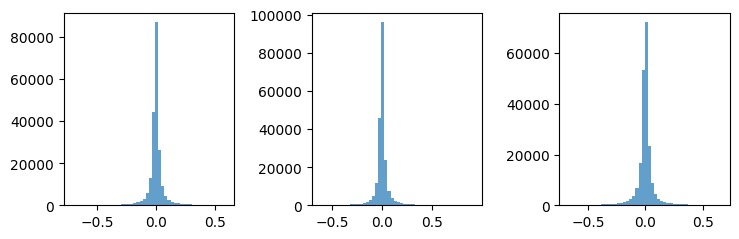

k1: unitvec
    x: [[0.0523], [-0.392], [0.755], [-0.314], ... [-0.311], [-0.477], [-0.706], [0.969]]
    y: [[0.715], [0.303], [-0.61], [0.822], ... [-0.909], [-0.654], [0.174], [-0.071]]
    z: [[0.697], [-0.869], [0.242], [-0.476], ... [0.276], [-0.587], [-0.687], [-0.236]]
 ---> Plotting ---> 


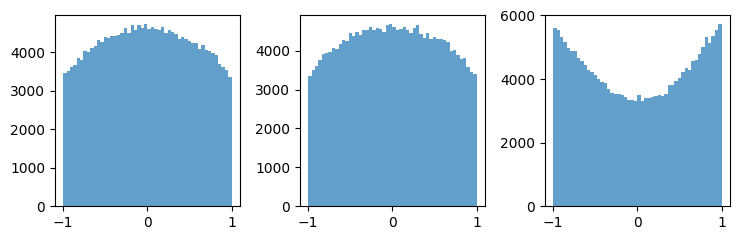

k2: unitvec
    x: [[-0.621], [0.69], [-0.433], [0.104], ... [-0.845], [-0.342], [0.922], [-0.912]]
    y: [[0.78], [0.332], [-0.84], [-0.858], ... [-0.159], [0.477], [-0.387], [0.00244]]
    z: [[0.0771], [-0.643], [0.326], [-0.504], ... [-0.51], [0.81], [-0.00779], [0.41]]
 ---> Plotting ---> 


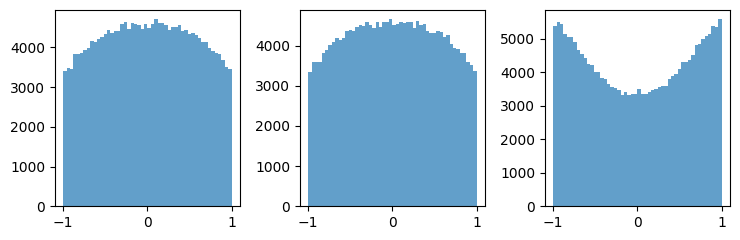

 -- Check -- : -- Strat --
 -- cosine angle between hi and tau+- 
 ---> Plotting ---> 


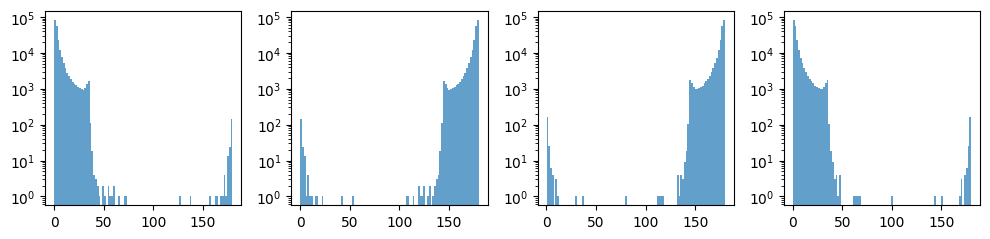

 -- h1xh2 --
    x: [[-0.00771], [0.0312], [-0.0461], [0.0242, ... [-0.00531], [0.115], [-0.292]]
    y: [[-0.0325], [-0.018], [0.019], [-0.0743], ... 0.0121], [0.0217], [-0.0438], [0.0134]]
    z: [[-0.0377], [0.0549], [-0.00681], [0.018], ... [-0.0131], [0.0316], [0.014], [0.109]]
 ---> Plotting ---> 


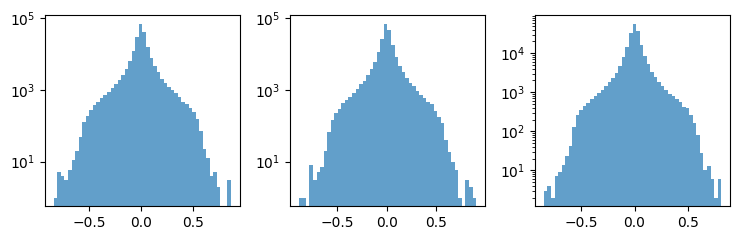

h1xh2.dot(p4_taum_hrest.pvec.unit) : h1xh2.dot(p4_taup_hrest.pvec.unit)
 ---> Plotting ---> 


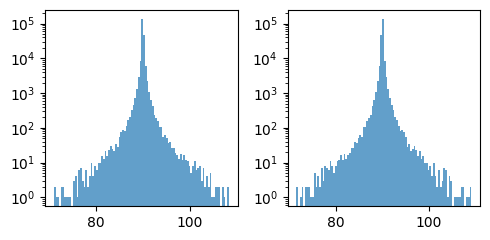

 -- Check -- : -- End --
Angle: [[-0.000365], [0.000419], [0.000784], ... [-0.000262], [0.00167], [-0.00467]]
 ---> Plotting ---> 


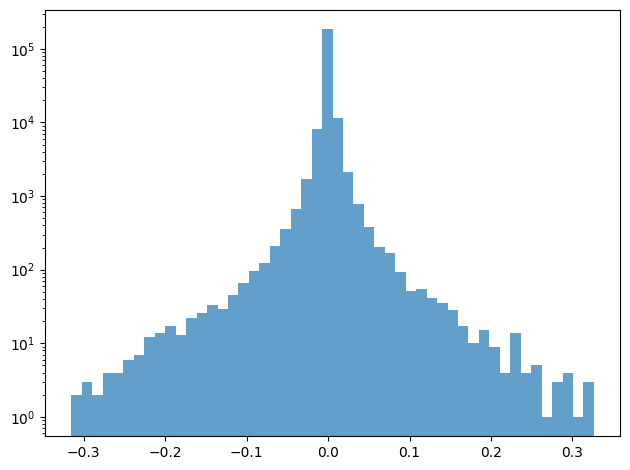

 ---> Plotting ---> 


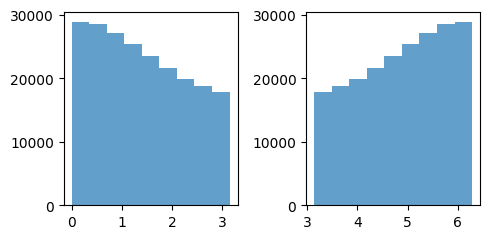

PhiCP: [[0.954], [5.11], [4.98], [4.19], [4.67], ... [2.76], [4.98], [2.25], [3.92], [2.95]]
 ---> Plotting ---> 


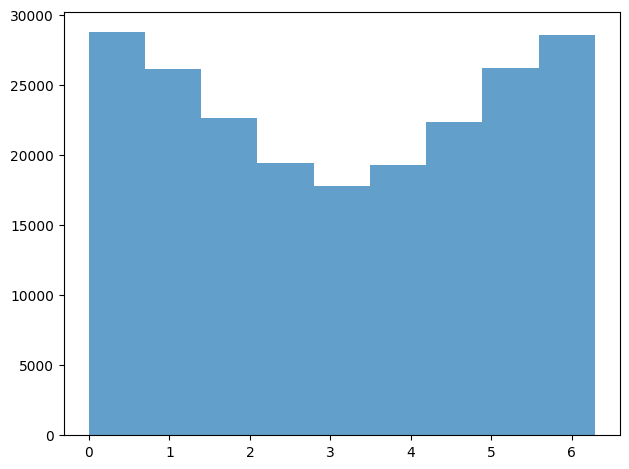

<Array [[0.954], [5.11], ... [3.92], [2.95]] type='211211 * option[var * ?float64]'>

In [35]:
phicp_obj = PhiCPComp(cat="rhorho", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp

 

--- get_evtinfo_a1a1 --- 
 --- get the masks to select a1-a1 events --- 
 --- then construct Lorentz vector --- 
Selection of a1-a1 pair [mask]: [False, False, False, False, False, False, ... False, False, False, False, False]
n total events: 1709262
n selected events: 35094
 [15]	[16, -211, -211, 211]
 [49.2]	[32.2, 2.53, 9.69, 4.83]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [76.8]	[21.1, 6.45, 7.28, 42]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [68.2]	[11.1, 17.9, 22.4, 16.8]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [49.8]	[18.4, 9.47, 17.6, 4.28]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [50.6]	[2.23, 38.9, 5.28, 4.28]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [74.2]	[36.5, 1.94, 17.2, 18.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [49.1]	[7.55, 15.4, 13.1, 13.1]
 [2]	[1, 1, 1, 1]
 [-15]	[-16, 211, 211, -211]
 [69]	[25, 10.2, 19.2, 14.6]
 [2]	[1, 1, 1, 1]


 [15]	[16, -211, -211, 211]
 [51]	[7.06, 23.6, 19.6, 0.699]
 [2]	[1, 1, 1, 1]
 [-15

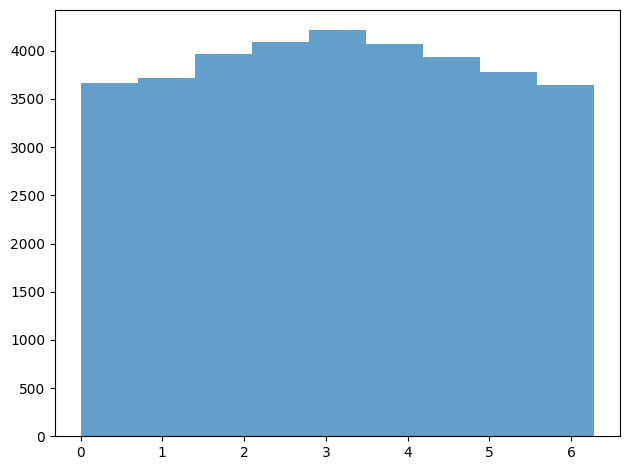

<Array [[6.02], [0.304], ... [1.39], [1.06]] type='35094 * option[var * ?float64]'>

In [36]:
phicp_obj = PhiCPComp(cat="a1a1", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
#phicp = phicp_obj.comp_phiCP()
phicp = phicp_obj.comp_PhiCP_DP()
phicp

In [37]:
"""
phicp_obj = PhiCPComp(cat="pipi", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
#phicp = phicp_obj.comp_PhiCP_DP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="pipi", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\n#phicp = phicp_obj.comp_PhiCP_DP()\nphicp\n'

In [38]:
"""
phicp_obj = PhiCPComp(cat="a1a1", 
                      taum=taum,
                      taup=taup,
                      taum_decay=taum_children,
                      taup_decay=taup_children)
phicp = phicp_obj.comp_phiCP()
phicp
"""

'\nphicp_obj = PhiCPComp(cat="a1a1", \n                      taum=taum,\n                      taup=taup,\n                      taum_decay=taum_children,\n                      taup_decay=taup_children)\nphicp = phicp_obj.comp_phiCP()\nphicp\n'

In [39]:
#ak.ravel(phicp)

In [40]:
#plothist(arrlist=[ak.ravel(phicp).to_numpy()], bins=9)

In [41]:
#10/2/5

In [42]:
from TComplex import TComplex

In [43]:
a = np.complex(2,2)
b = a

/var/folders/1h/pmwmdycj247fxs340zx84y5w0000gq/T/ipykernel_71187/1570323349.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.complex(2,2)


In [44]:
c = a**3

In [45]:
a, b, c

((2+2j), (2+2j), (-16+16j))

In [46]:
d = TComplex(ak.Array([[2,2], [3,3]]), ak.Array([[4,4], [6,6]]))
e = TComplex(ak.Array([[2,2], [3,3]]), ak.Array([[4,4], [6,6]]))
d, e

(<TComplex.TComplex at 0x107e8da10>, <TComplex.TComplex at 0x3221883d0>)

In [47]:
d.Re(), d.Im()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>)

In [48]:
e.Re(), e.Im()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>)

In [49]:
a = d/e

In [50]:
a.Im()

<Array [[0, 0], [0, 0]] type='2 * var * float64'>

In [51]:
a = TComplex(2,4)
b = TComplex(2,2)

In [52]:
c = a/b
c.Re(), c.Im()

(1.5, 0.5)

In [53]:
f = -e*e*e

In [54]:
d.Re(), e.Re(), f.Re()

(<Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[2, 2], [3, 3]] type='2 * var * int64'>,
 <Array [[88, 88], [297, 297]] type='2 * var * int64'>)

In [55]:
d.Im(), e.Im(), f.Im()

(<Array [[4, 4], [6, 6]] type='2 * var * int64'>,
 <Array [[4, 4], [6, 6]] type='2 * var * int64'>,
 <Array [[16, 16], [54, 54]] type='2 * var * int64'>)

In [56]:
f.Im()

<Array [[16, 16], [54, 54]] type='2 * var * int64'>

In [57]:
a = np.complex(2,2)
a

/var/folders/1h/pmwmdycj247fxs340zx84y5w0000gq/T/ipykernel_71187/2129234747.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.complex(2,2)


(2+2j)

In [58]:
a-2

2j

In [59]:
a/2

(1+1j)

In [60]:
a*2

(4+4j)